# Exploratory Data Analysis

## 1. Top 5 Countries by Number of Transactions

We analyze the distribution of orders across different countries. This helps us identify where most customers are located, which is useful for geographical segmentation or international strategy.

Only the top 5 countries with the highest number of transactions are displayed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn
from sklearn.preprocessing import StandardScaler # Import StandardScaler

In [2]:
df = pd.read_csv('OnlineRetail_cleaned.csv', encoding='ISO-8859-1')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [3]:
# 1. Top 5 countries by number of transactions
print("Top 5 countries with most orders:")
print(df['Country'].value_counts().head())

Top 5 countries with most orders:
Country
United Kingdom    349203
Germany             9025
France              8326
EIRE                7226
Spain               2479
Name: count, dtype: int64


## 2. Total Revenue by Country (Excluding UK)

Here, we calculate the total revenue contributed by each country and visualize the top 10 international markets (excluding the United Kingdom, which dominates the dataset).

This helps identify the most valuable international customer segments for possible expansion.


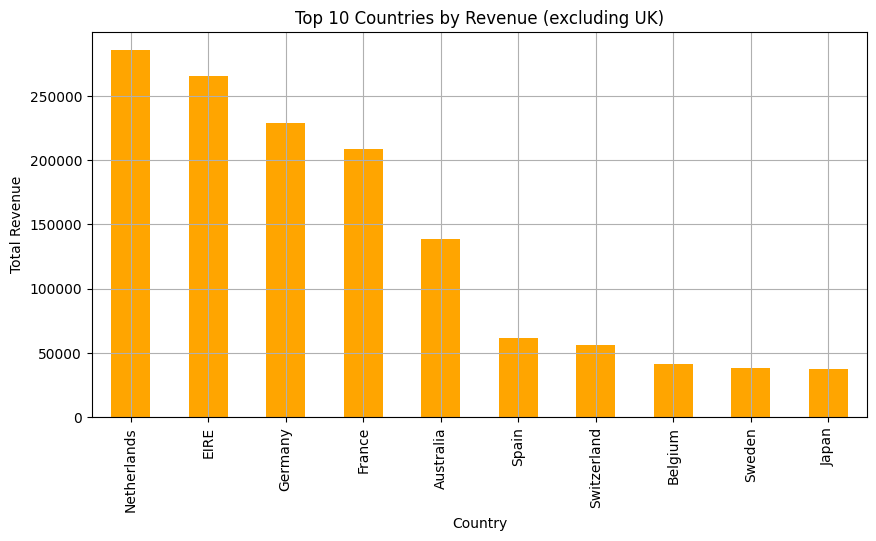

In [4]:
# 2. Total revenue by country (excluding UK)
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
country_revenue.drop('United Kingdom', errors='ignore').head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Revenue (excluding UK)")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


## 3. Most Sold Products

We display the top 10 most frequently sold products by description. This helps understand product demand and may inform clustering features if we consider product preferences.

Although not directly used in K-Means, it helps in profiling and recommendation strategies.


In [5]:
# 3. Most sold products (top 10)
print("\nTop 10 most sold products:")
print(df['Description'].value_counts().head(10))


Top 10 most sold products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: count, dtype: int64


## 4. Monthly Revenue Trend

We group the data by invoice month to observe the revenue trend over time.

This helps identify seasonality or sales cycles which are crucial for understanding **recency and frequency** — useful for RFM segmentation and marketing timing.


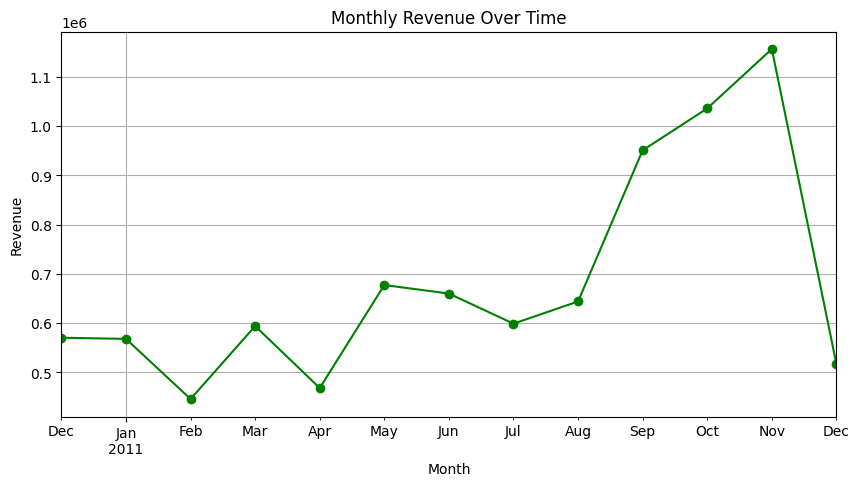

In [6]:
# Make sure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Create InvoiceMonth from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Now group by InvoiceMonth
monthly_revenue = df.groupby('InvoiceMonth')['TotalPrice'].sum()

# Plot the trend
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


## 5. Distribution of Order Values (Below ₹100)

We visualize the distribution of order values, focusing on small transactions below ₹100.

This helps detect common purchase sizes, outliers, and customer price sensitivity — which supports monetary-based segmentation.


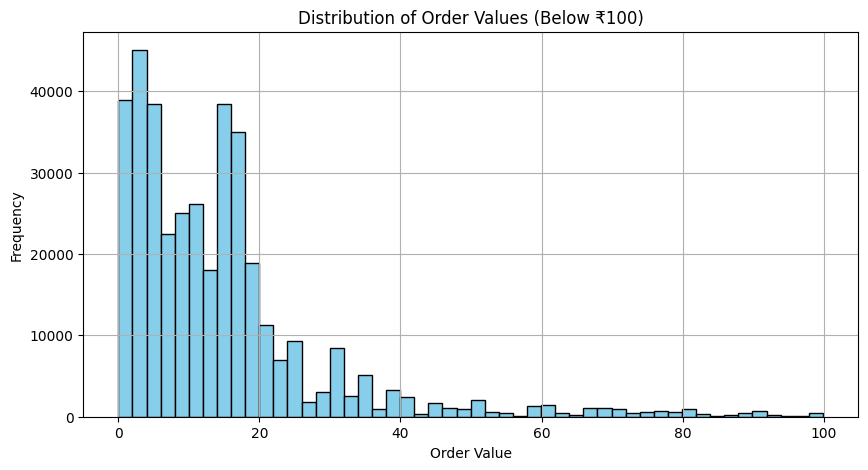

In [7]:
# 5. Distribution of order values (filtered to show common range)
filtered_df = df[df['TotalPrice'] < 100]
plt.figure(figsize=(10, 5))
plt.hist(filtered_df['TotalPrice'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Order Values (Below ₹100)")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [8]:
print(df[['InvoiceDate', 'InvoiceMonth']].head())


          InvoiceDate InvoiceMonth
0 2010-12-01 08:26:00      2010-12
1 2010-12-01 08:26:00      2010-12
2 2010-12-01 08:26:00      2010-12
3 2010-12-01 08:26:00      2010-12
4 2010-12-01 08:26:00      2010-12


# *Normalisation and scaling of clean data*


In [9]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')


In [10]:

from datetime import datetime

# Now this will work correctly
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Preview
print(rfm.head())



   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40


# Normalise the RFM table

In [11]:
# Extract only the features to scale
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to a DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Preview scaled data
print(rfm_scaled_df.head())


    Recency  Frequency  Monetary
0  2.334574  -0.425097  8.363010
1 -0.905340   0.354417  0.251699
2 -0.175360  -0.035340 -0.027988
3 -0.735345  -0.425097 -0.032406
4  2.174578  -0.425097 -0.190812


# WEEK-2

## *Applying K-Means Clustering*
We apply K-Means clustering to the normalized RFM dataset to segment customers based on Recency, Frequency, and Monetary values. Initially, we assume 3 clusters. The resulting cluster labels are added back to the original RFM table for further analysis.


In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Apply KMeans with arbitrary number of clusters (e.g. 3 initially)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(rfm_scaled)  # rfm_scaled = normalized RFM data

# Add the cluster labels to the RFM data
rfm['Cluster'] = kmeans.labels_


## *Finding Optimal Number of Clusters: Elbow Method*
The Elbow Method is used to find the optimal number of clusters by plotting the Sum of Squared Errors (SSE) for different values of `k`. The point where the SSE starts to diminish slowly (elbow point) suggests a good value for `k`.


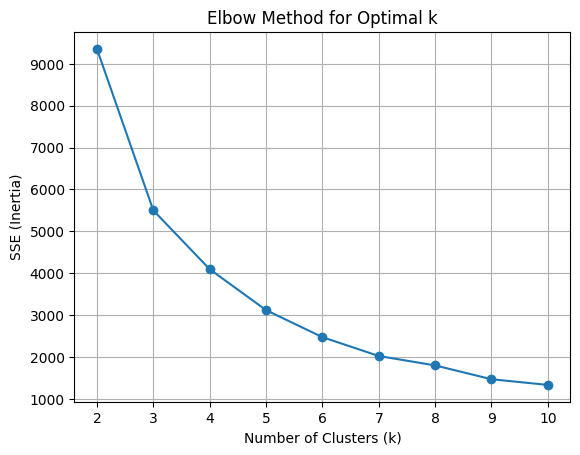

In [13]:
sse = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)  # Sum of squared errors

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


## *Evaluating Cluster Quality: Silhouette Score*
The Silhouette Score measures how similar a point is to its own cluster compared to other clusters. We compute the Silhouette Score for different values of `k`. A higher score indicates better cluster separation.


In [14]:
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"For k = {k}, Silhouette Score = {score:.4f}")


For k = 2, Silhouette Score = 0.5604
For k = 3, Silhouette Score = 0.5853
For k = 4, Silhouette Score = 0.6162
For k = 5, Silhouette Score = 0.6165
For k = 6, Silhouette Score = 0.5983
For k = 7, Silhouette Score = 0.5171
For k = 8, Silhouette Score = 0.4912
For k = 9, Silhouette Score = 0.4784
For k = 10, Silhouette Score = 0.4448


## *Dimensionality Reduction using PCA*
Since our RFM data is multi-dimensional, we use PCA (Principal Component Analysis) to reduce the features to 2D. This helps in visualizing the clusters formed by K-Means in two-dimensional space.

### Visualizing Customer Segments
Using the PCA-reduced dimensions, we plot a scatter plot colored by cluster labels. This visualization helps to understand how the customers are grouped based on their purchasing behavior.



## Cluster visualization
### We used PCA (Principal Component Analysis) to reduce 3D RFM data into 2D for plotting.

### We then used scatter plots to show clusters:

#### Each dot = customer
#### Color = cluster label
#### 0 -> High spenders, frequent buyers
#### 1 -> Infrequent, low-value customers
#### 2 -> Recent but not very high-value buyers

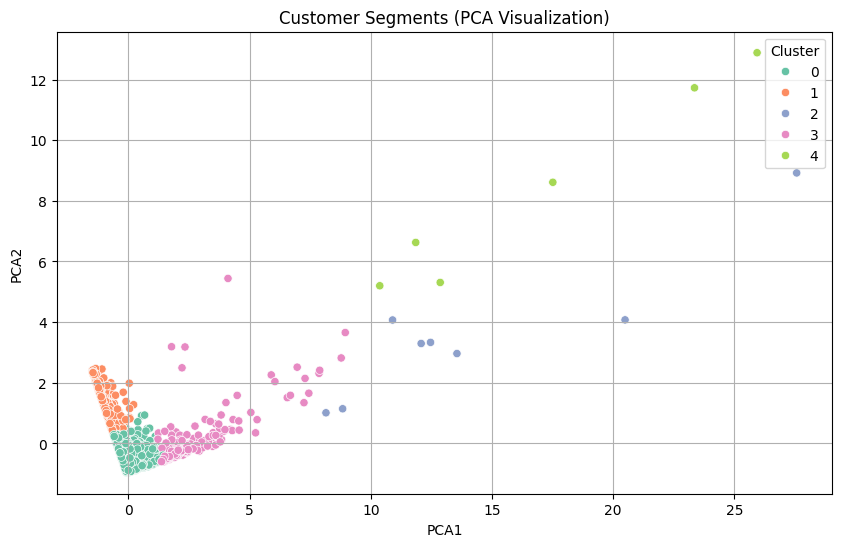

In [15]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Customer Segments (PCA Visualization)")
plt.grid(True)
plt.show()


# WEEK 3
## 1 Profiling each cluster
### We’ll start by adding the cluster labels back to the original (scaled) RFM data, then group by the cluster to analyze:
### -> Recency: How recently a customer made a purchase (lower is better)

### -> Frequency: How often they purchase (higher is better)

### -> Monetary: How much they spend (higher is better)

### -> Count: Number of customers in that cluster


In [16]:
# Add cluster labels to original RFM data (not scaled)
rfm['Cluster'] = kmeans.labels_

# View average R, F, M values for each cluster
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).round(2)

cluster_profile


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,43.92,3.65,1333.13,3048
1,248.47,1.55,478.65,1063
2,6.50,120.50,55099.49,8
3,15.67,21.29,12813.94,213
4,7.67,42.83,190808.54,6


## 2 Visualize the cluster profiles
### Easily spot which cluster has:

### -> High spenders
### -> Frequent shoppers
### -> Recent purchasers
### -> Inactive or low-value customers

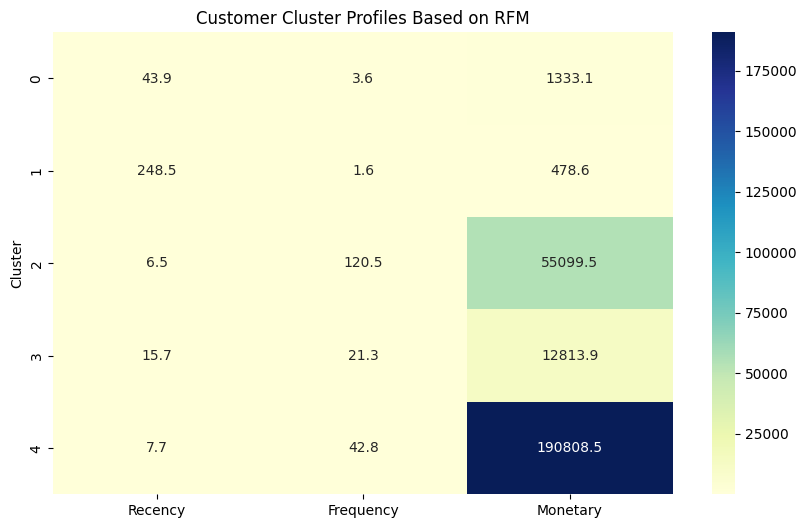

In [17]:
# Visualize cluster profile
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile.drop('Count', axis=1), annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Customer Cluster Profiles Based on RFM")
plt.show()
